# Assignment 2: predict insurance charges
#### Application of linear regression, decision tree, random forests and gradient boosting

In this assignment you'll predict insurance charges using 6 attributes of customers of a health insurance company. The data is stored in inurance.csv.

### 1 Import libraries and dataset
- import the relevant libraries to load, analyze and visualize the data

In [18]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

### 1A import and inspect files
- Load the csv file into a dataframe
- Inspect the dataframe

In [19]:
df = pd.read_csv('insurance.csv')
display(df.head(), df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 2 Convert to numeric and histograms


### 2A convert to numeric
- Three columns contain non-numeric data. Convert the data in these columns to numeric data.
- There are multiple ways to convert non-numeric data. One method is to use the Label Encoder in sklearn.

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex'] = pd.to_numeric(le.fit_transform(df['sex']))
df['smoker'] = pd.to_numeric(le.fit_transform(df['smoker']))
df['region'] = pd.to_numeric(le.fit_transform(df['region']))

### 2B histograms
- Create a histogram of each variable in the dataset

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

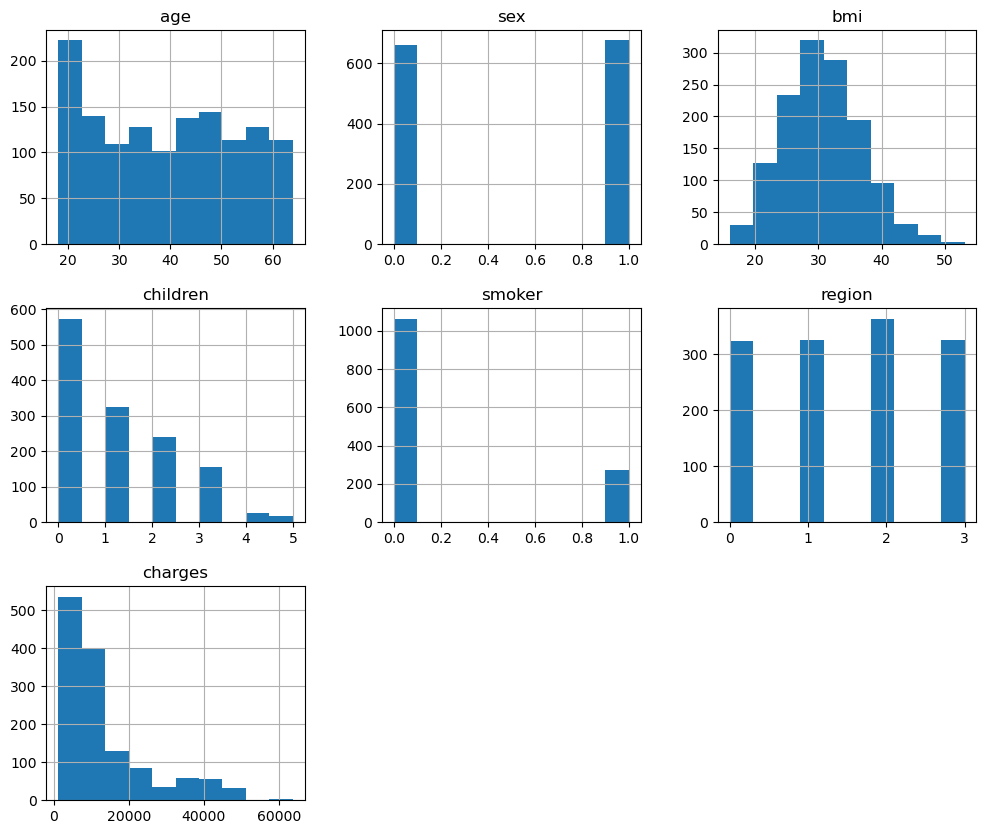

In [21]:
df.hist(figsize=(12,10))

## 3 Correlations, heatmap and boxplots

### 3A correlations
- Create a bar chart that shows the correlations between the independent variables and the dependent variable (charges).

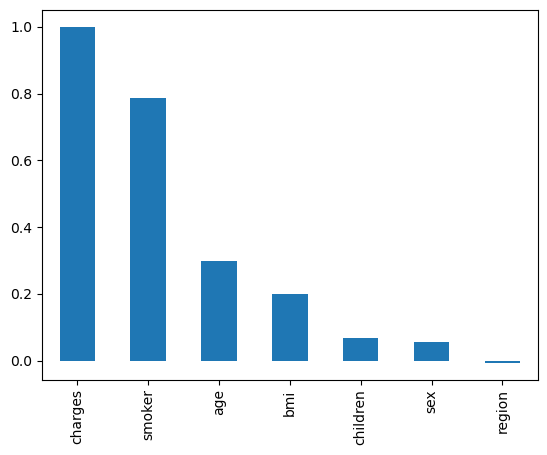

In [22]:
df.corr()['charges'].sort_values(ascending = False).plot(kind='bar')
plt.show()

### 3B heat map
- Create a heat map that visualizes the correlations between all variables.

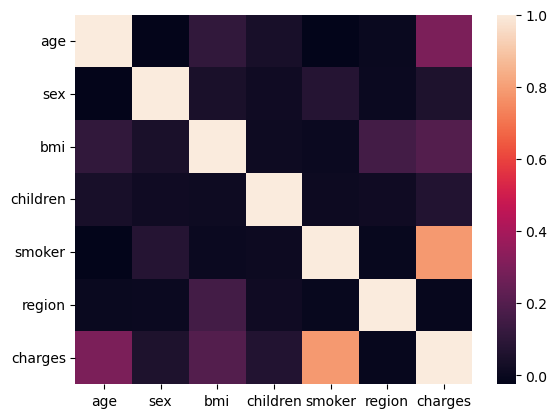

In [30]:
# plt.figure(figsize=(12,10))
# ax = sns.heatmap(df.corr())
# plt.show()
sns.heatmap(df.corr())
plt.show()

### 3C Boxplots
- Create a chart that shows boxplots of all independent variables.

<function matplotlib.pyplot.show(close=None, block=None)>

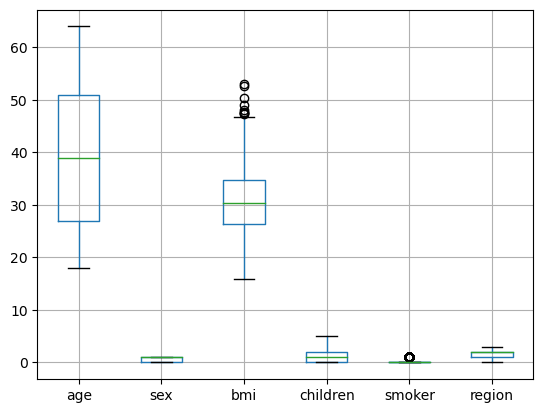

In [44]:
X = df.drop('charges',axis=1).boxplot()
y = df['charges']
plt.show


### 3D Outliers
- Which variable(s) have outliers? 
- Name 3 potential approaches to deal with these outliers. 
- What are the pro's and con's of each approach?

In [45]:
#  - Which variable(s) have outliers? BMI, SMOKER, AGE
#  - Name 3 potential approaches to deal with these outliers. IMPUTEREN, DROP COLUMN.
#  - What are the pro's and con's of each approach?

## 4 Linear models

### 4A train-test plit
- Split the data into a train set and a test set

In [46]:
X = df.drop('charges',axis=1)
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 4B Linear regression
- Apply linear regression to predict insurance charges.
- Determine the performance score of the training set
- Determine the performance score of the test set
- What are the regression coefficients? To what extent are they related to the correlation coefficients you found in the heatmap?

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

### 4C Ridge
- Apply ridge regression to predict insurance charges. Run the ridge regression at least 4 times with different values of alpha. Each run should be in a different cell.
- Explain what the alpha parameter does. Show the regression coefficients of each of the 4 runs to illustrate your answer.
- Determine the accuracy of the train set and of the test set of each run.
- Explain your choice for each alpha value. 
- What alpha value is best? Explain your answer.

### 4D Lasso
- Apply lasso regression to predict insurance charges. Run the lass0 regression at least 4 times with different values of alpha. Each run should be in a different cell.
- Explain what the alpha parameter does. Show the regression coefficients and number of features used of each of the 4 runs to illustrate your answer.
- Determine the accuracy of the train set and of the test set of each run.
- Explain your choice for each alpha value. 
- What alpha value is best? Explain your answer.

## 5 Decision tree

### 5A Decision tree regressor
- Apply the decision tree regressor to predict insurance charges. Run the tree regressor at least 4 times with different values of the max_depth parameter. Each run should be in a different cell.
- Determine the accuracy of the train set and of the test set of each run.
- Explain what the max_depth parameter does. Compare training set accuracy with test set accuracy to illustrate your answer.
- With which settings does the model perform best? Explain your answer.

### 5B Print tree
- Print the decision tree of the settings with the best performance.
Hint: use this link to find more information about printing decision trees: https://mljar.com/blog/visualize-decision-tree/
- Which variables are most important for predicting insurance charges? Explain your answer.

### 5C Feature importance
Do some research to find out about feature importance and how to determine this using sklearn. 
- What is feature importance of a decision tree?
- Determine and plot the feature importance of your model.

## 6 Random forest

### 6A Random forest regressor
- Apply the random tree regressor to predict insurance charges. 
- Run the regressor with different values for the parameter that determines the number of trees. Which value returns the best result?
- Try some of the other parameters of the model. What is the impact of these parameters?
- Explain what the max_leaf_nodes parameter does? How does it impact the performance of your model?
- With which settings does the model perform best? Explain your answer.

### 6B Feature importance
- Determine and plot the feature importance of your model.

## 7 Gradient boosting

### 7A Gradient Boosting regressor
- Apply the gradient boosting regressor to predict insurance charges. 
- Run the regressor with different values for the parameter that determines the depth of the trees. Which value returns the best result?
- Try some of the other parameters of the model. What is the impact of these parameters?
- Explain what the learning_rate parameter does? How does it impact the performance of your model?
- With which settings does the model perform best? Explain your answer.

### 7B Feature importance
- Determine and plot the feature importance of your model.